In [1]:
import geopandas as gpd
import pandas as pd

from shapely.geometry import Point
from datetime import datetime
import ee

from bokeh.models import Tabs, TabPanel
from bokeh.core.validation.warnings import EMPTY_LAYOUT, MISSING_RENDERERS
from bokeh.plotting import show, output_notebook
import bokeh

import acled_conflict_analysis
from acled_conflict_analysis import analysis
from acled_conflict_analysis import visuals
import geemap




# Comparing Addis Ababa and Nairobi

This web-book compares the Nighttime Lights and Air Pollution between Addis Ababa and Nairobi. 

In [2]:
addis = gpd.read_file('../../data/boundaries/eth_admbnda_adm1_csa_bofedb_2021.shp')
addis = addis[addis['ADM1_EN']=='Addis Ababa']

In [3]:
nairobi = gpd.read_file('../../data/boundaries/kenya/ken_admbnda_adm1_iebc_20191031.shp')
nairobi = nairobi[nairobi['ADM1_EN']=='Nairobi']

In [4]:
airpollution_nairobi = pd.read_csv('../../data/air_pollution/kenya/nairobi_adm1_no2_monthly_2019_2024.csv')
airpollution_nairobi_adm2 = pd.read_csv('../../data/air_pollution/kenya/nairobi_adm2_no2_monthly_2019_2024.csv')

In [5]:
airpollution_nairobi.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
airpollution_addis = pd.read_csv('../../data/air_pollution/addis/addis_adm1_no2_monthly_2019_2024.csv')
airpollution_addis.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
airpollution_monthly = airpollution_addis[['start_date', 'mean']].merge(airpollution_nairobi[['start_date', 'mean']], on='start_date', suffixes=('_addis', '_nairobi'))

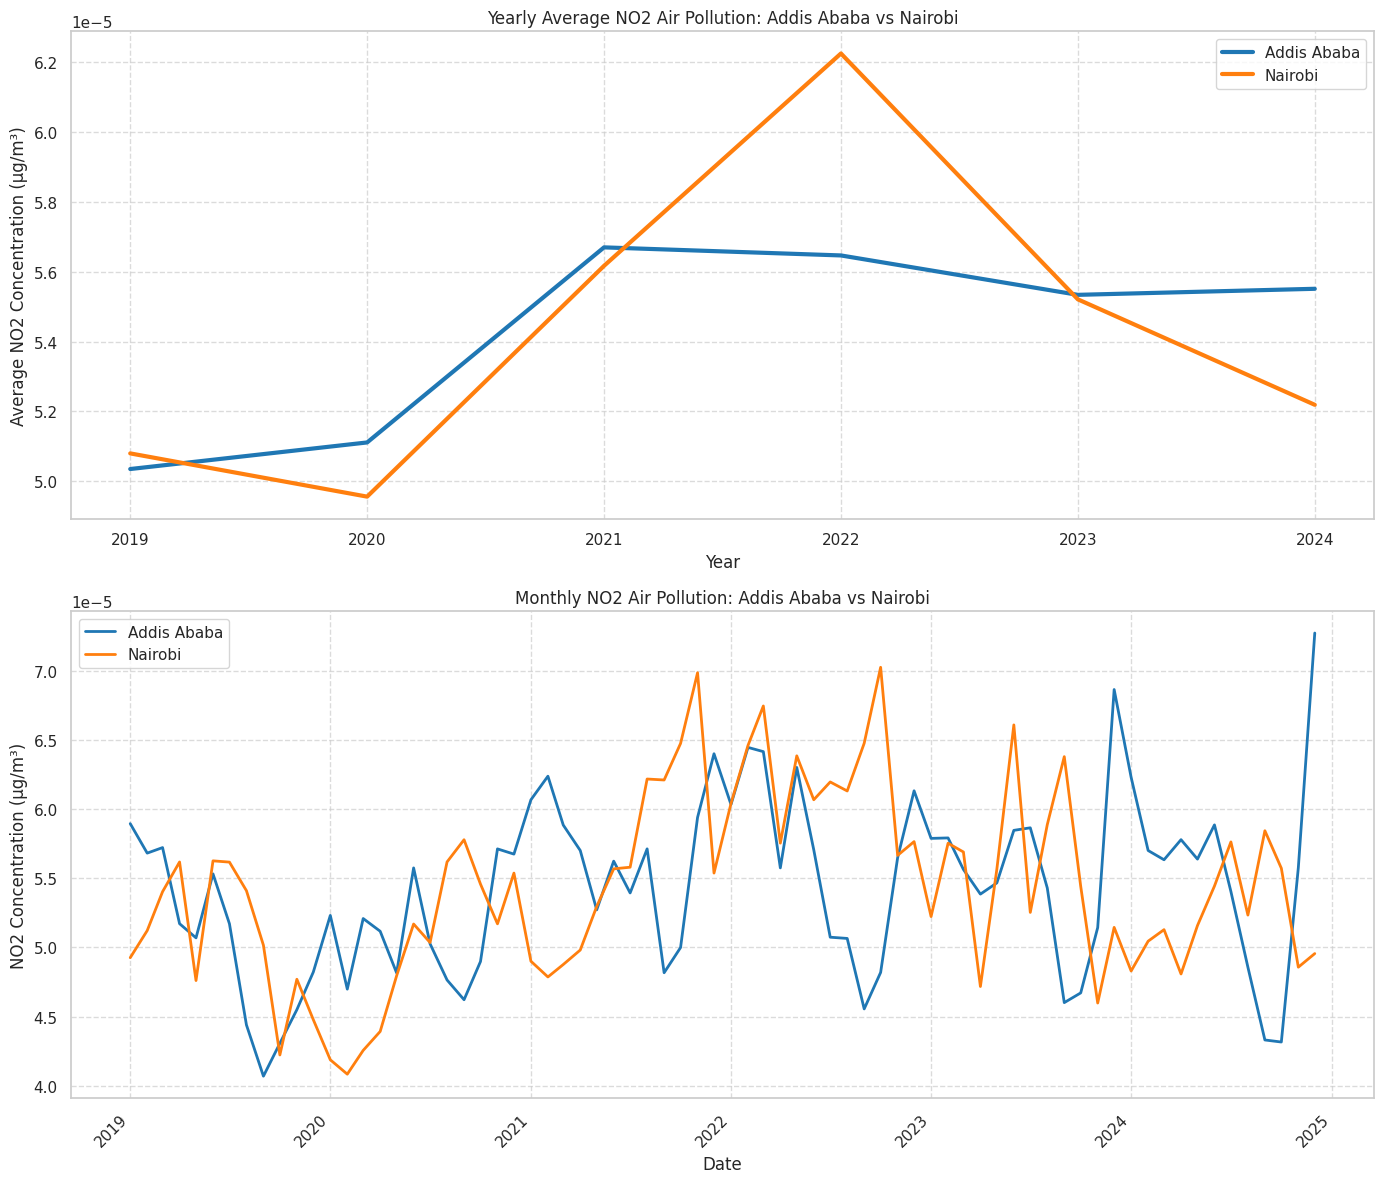

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set the style for the plots
sns.set(style="whitegrid")

# Try to use a font that supports the subscript characters
plt.rcParams['font.family'] = 'DejaVu Sans'  # This font typically supports subscripts better

# The rest of your code remains the same
# Ensure start_date is in datetime format
df['start_date'] = pd.to_datetime(df['start_date'])

# Create a figure with two subplots - yearly data first, then monthly
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Add a year column to the dataframe
df['year'] = df['start_date'].dt.year

# Group by year and calculate the mean for each city
yearly_data = df.groupby('year').agg({'mean_addis': 'mean', 'mean_nairobi': 'mean'}).reset_index()

# Plot yearly data (no markers at points)
ax1.plot(yearly_data['year'], yearly_data['mean_addis'], label='Addis Ababa', 
         linewidth=3, color='#1f77b4')
ax1.plot(yearly_data['year'], yearly_data['mean_nairobi'], label='Nairobi', 
         linewidth=3, color='#ff7f0e')

# Add labels and title for first plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Average NO2 Concentration (μg/m³)')  # Replaced subscript with regular 2
ax1.set_title('Yearly Average NO2 Air Pollution: Addis Ababa vs Nairobi')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Set x-ticks to show only years (no decimals)
ax1.set_xticks(yearly_data['year'])
ax1.set_xticklabels([str(int(year)) for year in yearly_data['year']])

# --- SECOND PLOT: MONTHLY DATA ---
ax2.plot(df['start_date'], df['mean_addis'], label='Addis Ababa', 
         linewidth=2, color='#1f77b4')
ax2.plot(df['start_date'], df['mean_nairobi'], label='Nairobi', 
         linewidth=2, color='#ff7f0e')

# Add labels and title for second plot
ax2.set_xlabel('Date')
ax2.set_ylabel('NO2 Concentration (μg/m³)')  # Replaced subscript with regular 2
ax2.set_title('Monthly NO2 Air Pollution: Addis Ababa vs Nairobi')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Rotate date labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('no2_comparison_yearly_monthly.png', dpi=300, bbox_inches='tight')
plt.show()